<h3>Linear regression with single variable </h3>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1. Use the head and describe function to examine the data and display few columns.
Ex. 2. Extract data from pandas structure to new variables of ndarray type

In [69]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [70]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 0, 'population of City in 10,000s')

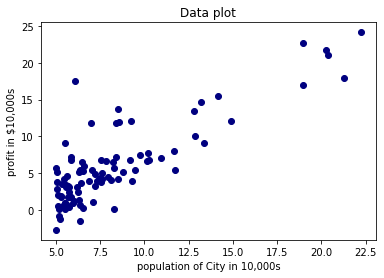

In [71]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x, y, color='navy')
plt.title('Data plot')
plt.ylabel('profit in $10,000s')
plt.xlabel('population of City in 10,000s')


Ex. 3. In order to make the cost function work (intercept value 
θ
0
 has to be multiplied by 1) we need to insert a column of ones at the top of x.
 
Ex. 4. We need to separate our data into independent variables X and our dependent variable y. We also need to initialise parameter 
θ
.

In [72]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on 
X
,
y
 and parameter 
θ
.

In [73]:
def h(X, theta):
    return theta.T@X

def computeCost(X, y, theta):
    diff_sq = (h(X, theta) - y)**2
    return diff_sq.sum() / (2*X.shape[1])

print(computeCost(X, y, theta))

32.072733877455676


Ex. 7 Please implement the gradient descent algorithm:

In [74]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        theta0_temp = theta[0,0] - alpha * (h(X, theta) - y).sum() / X.shape[1]
        theta1_temp = theta[1,0] - alpha * (h(X, theta) - y)@X[1,:].T / X.shape[1]
        theta[0,0] = theta0_temp
        theta[1,0] = theta1_temp
        cost += [computeCost(X, y, theta)]

    return theta, cost


In [75]:
alpha = 0.01
it = 1000
# print(simple_gradient(X, y, theta, alpha, it))


Ex. 8 Please calculate the optimal parameters for the dataset.

Ex. 9 Please calculate the cost function for the given 
θ

Ex. 10 Plot the regression function and our dataset.

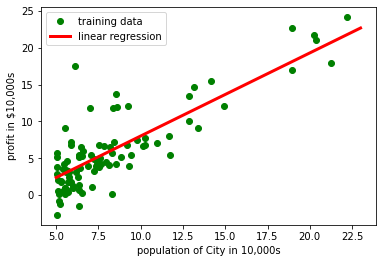

In [76]:
plt.plot(x, y.T, 'go', label='training data')
theta, cost = simple_gradient(X, y, theta, alpha, it)
# plt.plot(simple_gradient(X, y, theta, alpha, it)[1])
# plt.plot(theta, y.T)
x_reg = np.arange(5, 24)
y_reg = theta[1] * x_reg + theta[0]
# print(x_reg)
plt.plot(x_reg, y_reg, 'r', linewidth=3, label='linear regression')
plt.ylabel('profit in $10,000s')
plt.xlabel('population of City in 10,000s')
plt.legend()


Ex. 11 Plot the relationship between the cost function and number of iterations.

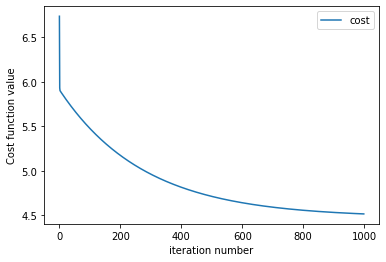

In [77]:
plt.plot(cost, label='cost')
plt.ylabel('Cost function value')
plt.xlabel('iteration number')
plt.legend()

<h2> Linear regression with multiple variables</h2>

In [78]:
import numpy as np
from sklearn import datasets, linear_model

In [79]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Normalization 

In [80]:
for column in data2:
    data2[column] = (data2[column] - data2[column].mean()) / data2[column].std()

data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [81]:
data2.insert(0, '1', [1]*data2.shape[0])



In [82]:
X2 = np.matrix(data2[['1','Size','Bedrooms']].values)
y2 = np.matrix(data2[['Price']].values)

In [83]:
theta2 = np.zeros((X2.shape[1], 1))


In [84]:
def computeCost(x, y, theta):
    
    return  1 / (2 * x.shape[0]) * np.sum(np.square(x * theta - y)) 
computeCost(X2, y2, theta2)

0.4893617021276595

In [85]:
def simple_gradient(x, y, theta, alpha, iterations):
    cost = []
    for _ in range(iterations):
        theta = theta - (1/len(y)) * alpha * x.T * (x * theta - y)
        cost += [computeCost(x, y, theta)]
 
    return theta, cost

In [86]:
alpha = 0.01
it = 1000
theta2, cost2 = simple_gradient(X2, y2, theta2, alpha, it)

Text(0.5, 0, 'Price')

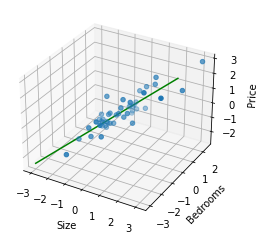

In [87]:
xr = np.arange(-3, 3)
yr = np.arange(-3, 3)
zr = theta2.flat[0] + theta2.flat[1] * xr + theta2.flat[2] * yr
ax = plt.axes(projection='3d')
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'])
ax.plot(xr, yr, zr, 'g')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

Text(0.5, 1.0, 'Size')

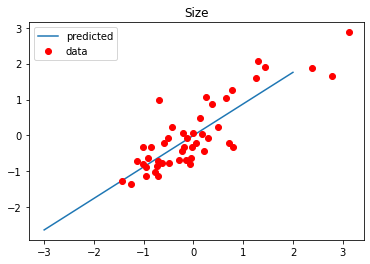

In [88]:
plt.plot(xr, theta2.flat[0] + theta2.flat[1] * xr, label='predicted')
plt.plot(data2['Size'], data2['Price'], 'ro', label='data')
plt.legend()
plt.title('Size')

Text(0.5, 1.0, 'Bedrooms')

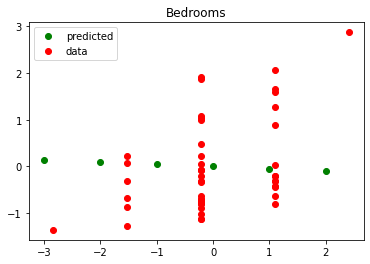

In [89]:
plt.plot(yr, theta2.flat[0] + theta2.flat[2] * yr, 'go', label='predicted')
plt.plot(data2['Bedrooms'], data2['Price'], 'ro', label='data')
plt.legend()
plt.title('Bedrooms')

Text(0.5, 1.0, 'Cost')

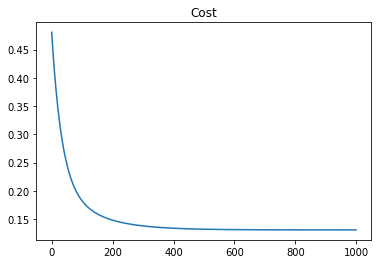

In [90]:
plt.plot(cost2)
plt.title('Cost')

<h3> Wykorzystanie pakietu scikit-learn</h3>

In [91]:
path = os.getcwd() + '/ex1data2.txt'
data3 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data3.head()
# Data import
# Normalization
# Split into train and test sets (70-30%)
for column in data3:
    data3[column] = (data3[column] - data3[column].mean()) / data3[column].std()

X = data3[['Size','Bedrooms']]
y = data3['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    


In [92]:
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [ 0.8333611  -0.01719408]
Residual sum of squares: 0.48679891655550567


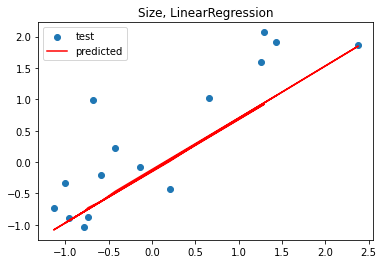

In [93]:
plt.scatter(X_test['Size'], y_test, label='test')
plt.plot(X_test['Size'], y_predicted, 'r', label='predicted')
plt.title('Size, LinearRegression')
plt.legend()

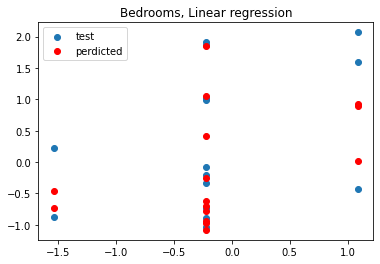

In [94]:
plt.scatter(X_test['Bedrooms'], y_test, label='test')
plt.plot(X_test['Bedrooms'], y_predicted, 'ro', label='perdicted')
plt.title('Bedrooms, Linear regression')
plt.legend()

In [95]:
# Creating an object 
regr = linear_model.Ridge()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.78844434 0.00783788]
Residual sum of squares: 0.5007835134366918


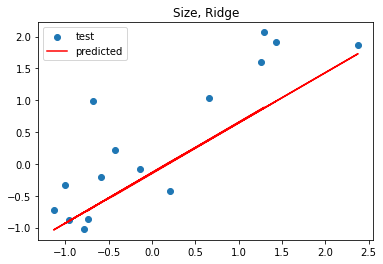

In [96]:
plt.scatter(X_test['Size'], y_test, label='test')
plt.plot(X_test['Size'], y_predicted, 'r', label='predicted')
plt.title('Size, Ridge')
plt.legend()

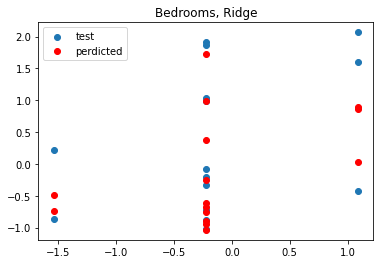

In [97]:
plt.scatter(X_test['Bedrooms'], y_test, label='test')
plt.plot(X_test['Bedrooms'], y_predicted, 'ro', label='perdicted')
plt.title('Bedrooms, Ridge')
plt.legend()

In [98]:
# Creating an object 
regr = linear_model.Lasso()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0. 0.]
Residual sum of squares: 1.4375805293308301


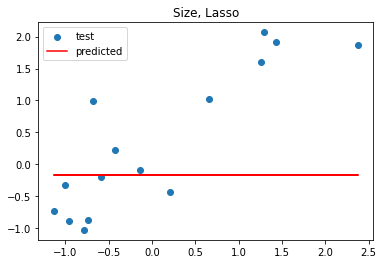

In [99]:
plt.scatter(X_test['Size'], y_test, label='test')
plt.plot(X_test['Size'], y_predicted, 'r', label='predicted')
plt.title('Size, Lasso')
plt.legend()

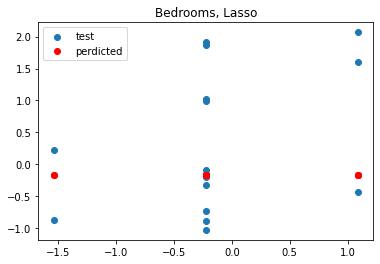

In [100]:
plt.scatter(X_test['Bedrooms'], y_test, label='test')
plt.plot(X_test['Bedrooms'], y_predicted, 'ro', label='perdicted')
plt.title('Bedrooms, Lasso')
plt.legend()

In [101]:
# Creating an object 
regr = linear_model.ElasticNet()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.17594644 0.        ]
Residual sum of squares: 1.1072092489717091


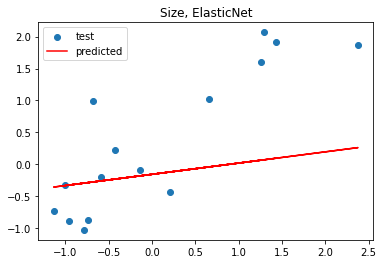

In [102]:
plt.scatter(X_test['Size'], y_test, label='test')
plt.plot(X_test['Size'], y_predicted, 'r', label='predicted')
plt.title('Size, ElasticNet')
plt.legend()

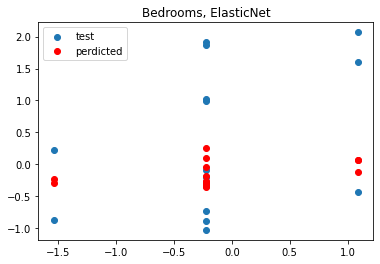

In [103]:
plt.scatter(X_test['Bedrooms'], y_test, label='test')
plt.plot(X_test['Bedrooms'], y_predicted, 'ro', label='perdicted')
plt.title('Bedrooms, ElasticNet')
plt.legend()